In [120]:
import pandas as pd

filepath = 'datasets/Teams.csv'
df_teams = pd.read_csv(filepath, header = 0)#.drop(['MOV','Run Line +/-'], axis=1)

'''
Extract predictor variables:

Main variable

attendance - Home attendance total

Other variables

divID - Team's division
SB - Stolen bases
SF - Sacrifice flies
'''

# Make unique primary key consisting of yearID and teamID (a team can be active across multiple years)

df_teams_red = df_teams[['yearID', 'teamID', 'attendance', 'divID', 'SB', 'SF']]
df_teams_red.set_index(['yearID','teamID'], inplace=True)
df_teams_red.head(15)
#df_teams_red.loc[1871]

attendance divID    SB  SF
yearID teamID                            
1871   BS1            NaN   NaN  73.0 NaN
       CH1            NaN   NaN  69.0 NaN
       CL1            NaN   NaN  18.0 NaN
       FW1            NaN   NaN  16.0 NaN
       NY2            NaN   NaN  46.0 NaN
       PH1            NaN   NaN  56.0 NaN
       RC1            NaN   NaN  53.0 NaN
       TRO            NaN   NaN  62.0 NaN
       WS3            NaN   NaN  48.0 NaN
1872   BL1            NaN   NaN  53.0 NaN
       BR1            NaN   NaN   8.0 NaN
       BR2            NaN   NaN  19.0 NaN
       BS1            NaN   NaN  48.0 NaN
       CL1            NaN   NaN  12.0 NaN
       MID            NaN   NaN   6.0 NaN

In [121]:
'''
Generate outcome variable:

win_percentages - Probability that a team wins a game
win_percentages = W/(W+L)
'''

df_calc_out = df_teams[['yearID', 'teamID', 'W', 'L']]
win_percentages = df_calc_out['W'].copy() / (df_calc_out['W'].copy() + df_calc_out['L'].copy())

In [122]:
# Remove rows containing NA values

df_teams_no_NA = df_teams_red.dropna()
df_teams_no_NA

attendance divID     SB    SF
yearID teamID                               
1970   ATL      1078848.0     W   58.0  42.0
       BAL      1057069.0     E   84.0  46.0
       BOS      1595278.0     E   50.0  47.0
       CAL      1077741.0     W   69.0  37.0
       CHA       495355.0     W   53.0  48.0
...                   ...   ...    ...   ...
2021   SLN      2102530.0     C   89.0  44.0
       TBA       761072.0     E   88.0  41.0
       TEX      2110258.0     W  106.0  31.0
       TOR       805901.0     E   81.0  35.0
       WAS      1465543.0     E   56.0  31.0

[1444 rows x 4 columns]

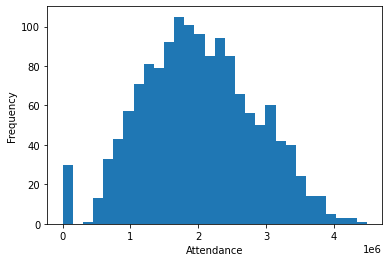

In [130]:
# Checking distributions of predictors

import matplotlib.pyplot as plt
import numpy as np

attendance = np.array(df_teams_no_NA['attendance'])
plt.hist(attendance, bins=30)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

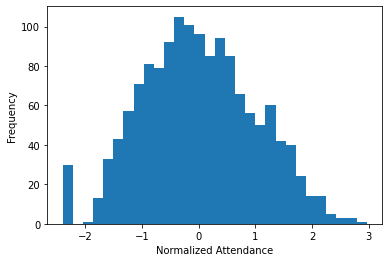

In [131]:
# Let's now standardize this data, as the scale of attendance might have a bias towards the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_attendance = scaler.fit_transform(attendance.reshape(-1,1))

plt.hist(scaled_attendance, bins=30)
plt.xlabel('Normalized Attendance')
plt.ylabel('Frequency')
plt.show()